In [4]:
import pandas as pd


data = pd.read_csv('churn.csv')

data = data.dropna()

encoded_data = pd.get_dummies(data, columns=['gender','region_category','joined_through_referral','membership_category','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback'])

boolean_cols = ['gender_F','gender_M','region_category_City','region_category_Town','region_category_Village','joined_through_referral_No','joined_through_referral_Yes','membership_category_Basic Membership','membership_category_Gold Membership','membership_category_No Membership','membership_category_Platinum Membership','membership_category_Premium Membership','membership_category_Silver Membership','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers','medium_of_operation_Both','medium_of_operation_Desktop','medium_of_operation_Smartphone','internet_option_Fiber_Optic','internet_option_Mobile_Data','internet_option_Wi-Fi','used_special_discount_No','used_special_discount_Yes','offer_application_preference_No','offer_application_preference_Yes','past_complaint_No','past_complaint_Yes','complaint_status_No Information Available','complaint_status_Not Applicable','complaint_status_Solved','complaint_status_Solved in Follow-up','complaint_status_Unsolved','feedback_No reason specified','feedback_Poor Customer Service','feedback_Poor Product Quality','feedback_Poor Website','feedback_Products always in Stock','feedback_Quality Customer Care','feedback_Reasonable Price','feedback_Too many ads','feedback_User Friendly Website']

encoded_data[boolean_cols] = encoded_data[boolean_cols].replace({True: 1, False:0})

encoded_data.drop('user_id',axis=1,inplace=True)
encoded_data.drop('joining_date',axis=1,inplace=True)
encoded_data.drop('last_visit_time',axis=1,inplace=True)
encoded_data = encoded_data.rename(columns={'membership_category_Basic Membership':'membership_category_Basic_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Gold Membership':'membership_category_Gold_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_No Membership':'membership_category_No_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Platinum Membership':'membership_category_Platinum_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Premium Membership':'membership_category_Premium_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Silver Membership':'membership_category_Silver_Membership'})
encoded_data = encoded_data.rename(columns={'preferred_offer_types_Credit/Debit Card Offers':'preferred_offer_types_Credit_Debit_Card_Offers'})
encoded_data = encoded_data.rename(columns={'preferred_offer_types_Gift Vouchers/Coupons':'preferred_offer_types_Gift_Vouchers_Coupons'})
encoded_data = encoded_data.rename(columns={'preferred_offer_types_Without Offers':'preferred_offer_types_Without_Offers'})
encoded_data = encoded_data.rename(columns={'internet_option_Wi-Fi':'internet_option_Wi_Fi'})
encoded_data = encoded_data.rename(columns={'complaint_status_No Information Available':'complaint_status_No_Information_Available'})
encoded_data = encoded_data.rename(columns={'complaint_status_Not Applicable':'complaint_status_Not_Applicable'})
encoded_data = encoded_data.rename(columns={'complaint_status_Solved in Follow-up':'complaint_status_Solved_in_Follow_up'})
encoded_data = encoded_data.rename(columns={'feedback_No reason specified':'feedback_No_reason_specified'})
encoded_data = encoded_data.rename(columns={'feedback_Poor Customer Service':'feedback_Poor_Customer_Service'})
encoded_data = encoded_data.rename(columns={'feedback_Poor Product Quality':'feedback_Poor_Product_Quality'})
encoded_data = encoded_data.rename(columns={'feedback_Poor Website':'feedback_Poor_Website'})
encoded_data = encoded_data.rename(columns={'feedback_Products always in Stock':'feedback_Products_always_in_Stock'})
encoded_data = encoded_data.rename(columns={'feedback_Quality Customer Care':'feedback_Quality_Customer_Care'})
encoded_data = encoded_data.rename(columns={'feedback_Reasonable Price':'feedback_Reasonable_Price'})
encoded_data = encoded_data.rename(columns={'feedback_Too many ads':'feedback_Too_many_ads'})
encoded_data = encoded_data.rename(columns={'feedback_User Friendly Website':'feedback_User_Friendly_Website'})
from sklearn.model_selection import train_test_split

X = encoded_data.drop(['churn_risk_score'],axis=1)
y = encoded_data['churn_risk_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

standard_cols = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
sc = StandardScaler()
X_train[standard_cols] = sc.fit_transform(X_train[standard_cols])
X_test[standard_cols] = sc.fit_transform(X_test[standard_cols])


In [5]:
X

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_F,gender_M,region_category_City,region_category_Town,...,complaint_status_Unsolved,feedback_No_reason_specified,feedback_Poor_Customer_Service,feedback_Poor_Product_Quality,feedback_Poor_Website,feedback_Products_always_in_Stock,feedback_Quality_Customer_Care,feedback_Reasonable_Price,feedback_Too_many_ads,feedback_User_Friendly_Website
3,63,10,56.67,15678.14,11.0,590.220000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,15,8,34.07,9151.14,29.0,655.430000,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
9,35,5,106.23,28232.59,16.0,984.933920,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11,33,11,74.38,23695.52,0.0,832.420000,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
14,36,19,31.39,76602.41,8.0,763.820000,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37000,25,6,119.83,13147.91,0.0,1019.382051,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
37003,42,3,529.58,42964.11,18.0,619.280000,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
37004,19,21,119.96,14218.43,7.0,781.840000,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
37006,27,15,368.50,27038.47,8.0,835.980000,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


XGBOOST

In [6]:
from xgboost import XGBClassifier

In [7]:
XGBclassifier = XGBClassifier()


In [8]:
XGBclassifier.fit(X_train.values,y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

CONFUSION MATRIX

/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

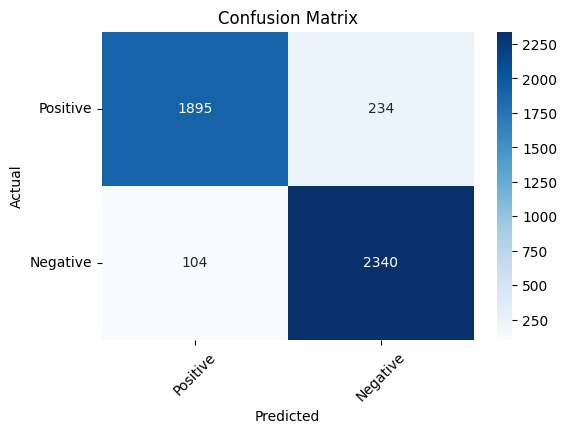

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = XGBclassifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, labels_A, labels_P):
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    ax.set_xticklabels(labels_A, rotation=45)
    ax.set_yticklabels(labels_P, rotation=0)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.title('Confusion Matrix')

confusion_matrix = cm
labels_A = ['Positive','Negative']
labels_P = ['Positive','Negative']



plot_confusion_matrix(confusion_matrix, labels_A, labels_P)
plt.show()

k-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
accuracy = cross_val_score(estimator=XGBclassifier, X= X_train, y=y_train, cv=10)


/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/gunes/Bitirme/django-venv/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

In [12]:
print("Accuracy : %{:.2f} ".format(accuracy.mean()*100))
print("Standart Deviation: %{:.2f} ".format(accuracy.std()*100))


Accuracy : %93.24 
Standart Deviation: %0.38 


In [13]:
from joblib import dump
dump(XGBclassifier,'/home/gunes/Bitirme/django-venv/src/churn/savedModels/xgboost.joblib')

['/home/gunes/Bitirme/django-venv/src/churn/savedModels/xgboost.joblib']